# Lecture 13 - Multidimensional Arrays with Numpy

#### Announcements:
* Quiz 3 should be all fixed up. Let me know if you spot any other problems.
* Don't forget to work on Data Ethics 1 - download your data and poke at it. Due Sunday!
* Lab 3 due Thursday night!

* From Brian Hutchinson (DS Advisor):
    1. Reminder that the major application deadline is this Friday, Oct
    15th. See here for information and the application form:
    https://cs.wwu.edu/data-science-bs-major-information-application

    2. There will be a Data Science BS Information Session held this
    Thursday, Oct 14th at 1pm. Here is relevant information for that event: https://cs.wwu.edu/data-science-bs-info-session

    3. The Western Washington Data-Driven Discovery Seminar Series kicks off
    this week. This series may be of great relevance and interest to Data
    Science students.  
        * Here's the blurb for that:  https://cs.wwu.edu/w2d2s2-ai-pnnl
        * and here is the zoom link: https://wwu-edu.zoom.us/j/97284053416?pwd=V3NJc3NsOUlMaUJMb1pBRkFXQlo4QT09
        * and here is the website with information about the talk series: https://sites.google.com/view/wwddss

#### Goals:
* Know the basics of how to work with numpy arrays.
  * Creation (np.array, np.zeros)
  * data types (np.uint8, np.float32, ...)
  * dimensions (a.shape, a.ndim)
  * Elementwise operations (array/scalar, array/array)
  * Images and videos as ndarrays
  * Indexing, slicing, boolean indexing/masking
  * A few useful functions:
    * transpose, reshape
    * sum, mean, max, min; axis kwarg
  * Broadcasting (basic example)

You may need to pip install the `imageio` and `matplotlib` packages for some of the following to work. Make sure you install it inside your data 311 virtual environment. The `numpy` package should already be installed as a dependency of `pandas`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

### The `numpy` package and `ndarray` type
The `numpy` package is largely focused on providing the `ndarray` type and related functionality; an `ndarray` is a **multi-dimensional array**.

Why is this interesting to us?
* Pandas is built on top of numpy, and inherits a lot of its concepts.

In [2]:
import pandas as pd
df = pd.DataFrame({"Count": range(100)})
type(df["Count"].array)

pandas.core.arrays.numpy_.PandasArray

* Numpy allows us to do (fast) manipulations and math on arrays of numbers, including linear algebra operations that are central to regression, machine learning, and other important data analysis techniques.

### Array Creation
`np.array`, `np.zeros`, `np.ones`

In [10]:
a = np.array([1, 2, 3])

In [9]:
b = np.zeros(4)

In [5]:
np.ones(17)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Array Data Types
`a.dtype`; dtype kwarg to `array`, `zeros`, `ones`

Unlike DataFrames, ndarrays need to be all one type. Numpy builtin types include:
* `np.uint`(8, 16, 32, 64)
* `np.int`(8, 16, 32, 64)
* `np.float`(16, 32, 64)

You can use python's native types too - `bool`, `float` (same as `np.float64`), `int` (same as `int64`)...

In [17]:
np.zeros(4, dtype=float).dtype

dtype('float64')

In [18]:
np.array([1, 0, 0], dtype=int).dtype

dtype('int64')

### Array Dimensions
`a.shape`, `a.ndim`

* In 2 dimensions, we think of the first as a row index and the second as a column index (this is matrix-style indexing)

In [20]:
a2d = np.ones((3, 4))
a2d

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

* Numpy arrays can have any number of dimensions!

In [24]:
a3d = np.ones((3,2,4))

In [25]:
a3d

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

* Storage order: last dimensions are most adjacent. Consequence: 2D arrays are stored row-major.

In [26]:
b2d = np.array([[1,2,3], [4,5,6]])
b2d

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
b3d = np.array([np.ones((2, 4))*i for i in range(3)])
b3d

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.]]])

### Transpose, Reshape
`a.T` (2d); `a.transpose(order)` (3d); `a.reshape(new_shape)`

In [39]:
b3d.shape

(3, 2, 4)

In [40]:
b3d.T.shape

(4, 2, 3)

In [46]:
a4d = np.ones((2,3,4,5))
a4d.shape

(2, 3, 4, 5)

In [45]:
a4d.transpose((1, 0, 2, 3)).shape

(3, 2, 4, 5)

In [47]:
b2d

array([[1, 2, 3],
       [4, 5, 6]])

In [48]:
b2d.shape

(2, 3)

In [49]:
b2d.reshape((3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [52]:
b2d.reshape((6,))

array([1, 2, 3, 4, 5, 6])

### Elementwise operations
Array/Scalar, Array/Array


In [55]:
b2d * 2 + 4

array([[ 6,  8, 10],
       [12, 14, 16]])

In [57]:
c2d = b2d + 5
c2d

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [58]:
b2d + c2d

array([[ 7,  9, 11],
       [13, 15, 17]])

In [59]:
b2d.shape == c2d.shape

True

### Multidimensional arrays as images

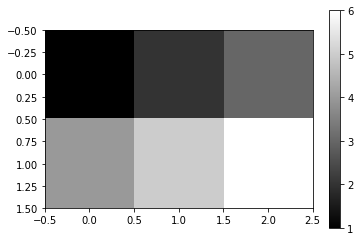

In [70]:
plt.imshow(b2d, cmap="gray")
plt.colorbar()

In [71]:
b2d

array([[1, 2, 3],
       [4, 5, 6]])

Color images are conventionally stored (row, column, channel), where channel is a dimension of size 3 containing red, green, and blue values.

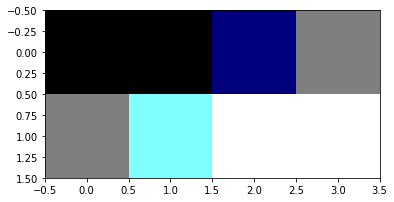

In [78]:
imcolor = b3d.reshape((2, 4, 3)) / b3d.max()
plt.imshow(imcolor)

In [117]:
beans = imageio.imread("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/data/beans_200.jpeg")

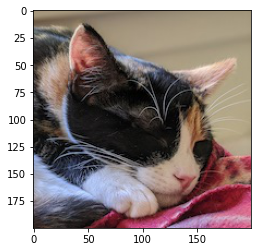

In [118]:
plt.imshow(beans)

In [81]:
beans.dtype

dtype('uint8')

In [82]:
beans.min(), beans.max()

(0, 255)

In [119]:
beans = beans.astype(np.float32) / 255.0

In [84]:
beans.min(), beans.max()

(0.0, 1.0)

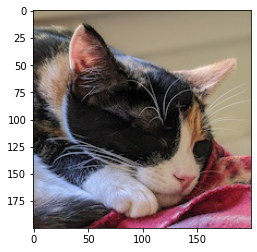

In [85]:
plt.imshow(beans)

### Indexing, Slicing, Masking/Boolean Indexing



In [91]:
beans[0,0,:]

Array([0.6392157 , 0.5764706 , 0.47843137], dtype=float32)

In [93]:
beans[0,:,:].shape

(200, 3)

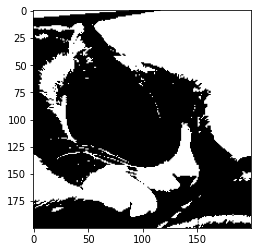

In [98]:
plt.imshow(beans[:,:,1] > 0.5, cmap="gray")

In [120]:
mask = beans[:,:,1] > 0.5
beans[mask, :].shape

(17594, 3)

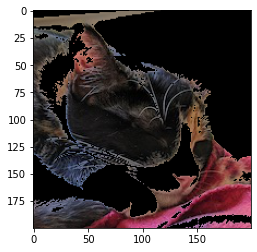

In [113]:
beans[mask,:] = 0
plt.imshow(beans)

### Useful Methods
`a.sum`, `a.mean`; `axis` kwarg

In [107]:
b2d

array([[1, 2, 3],
       [4, 5, 6]])

In [111]:
b2d.sum(axis=1)

array([ 6, 15])

In [114]:
b2d[b2d < 4] = 1

In [115]:
b2d

array([[1, 1, 1],
       [4, 5, 6]])

### Broadcasting
Array-Array elementwise operations require the arrays to have the same shape.

**Exception**: if a corresponding dimension is 1 in one array, the values will be repeated ("broadcast") along that dimension.

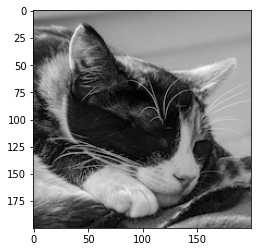

In [121]:
green_beans = beans[:,:,1] # the green channel of the beans image
plt.imshow(green_beans, cmap="gray")

(200, 200)
(200, 1)


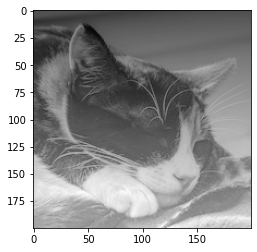

In [122]:
fade = np.array(range(200)) / 200
print(green_beans.shape)
print(fade[:,np.newaxis].shape)
plt.imshow(green_beans + fade[:,np.newaxis], cmap="gray")